<a href="https://colab.research.google.com/github/klonikar/RGB2point/blob/main/notebooks/RGB2point.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!rm -rf RGB2point/
!git clone https://github.com/klonikar/RGB2point.git

Cloning into 'RGB2point'...
remote: Enumerating objects: 61, done.
remote: Counting objects: 100% (61/61), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 61 (delta 27), reused 14 (delta 4), pack-reused 0 (from 0)
Receiving objects: 100% (61/61), 1.11 MiB | 3.65 MiB/s, done.
Resolving deltas: 100% (27/27), done.


In [2]:
!pip install timm
!pip install accelerate
!pip install wandb
!pip install open3d
!pip install scikit-learn
!pip install open3d
!pip install chamferdist

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 70.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 107.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [3]:
import os
os.chdir('/content/RGB2point')

In [4]:
# prompt: download pre-trained model from https://drive.google.com/file/d/1Z5luy_833YV6NGiKjGhfsfEUyaQkgua1/view?usp=sharing
# The filename is pc1024_three.pth

# The Google Drive ID is the part after "/d/" and before "/view"
file_id = '1Z5luy_833YV6NGiKjGhfsfEUyaQkgua1'
file_name = 'pc1024_three.pth'

# Download the file from Google Drive
!gdown --id '{file_id}' -O '{file_name}'

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1Z5luy_833YV6NGiKjGhfsfEUyaQkgua1
From (redirected): https://drive.google.com/uc?id=1Z5luy_833YV6NGiKjGhfsfEUyaQkgua1&confirm=t&uuid=2604cf8f-8efe-4a37-9533-a66e55261a98
To: /content/RGB2point/pc1024_three.pth
100% 700M/700M [00:08<00:00, 87.2MB/s]


In [5]:
!rm result/1013.ply
!python inference.py

model.safetensors: 100% 346M/346M [00:01<00:00, 191MB/s]
input_feature_dim:4096
dim_feedforward:2048
point_cloud_size:3072
Image from img/1013.jpg saved to result/1013.ply


Shape of point cloud: (1024, 3)


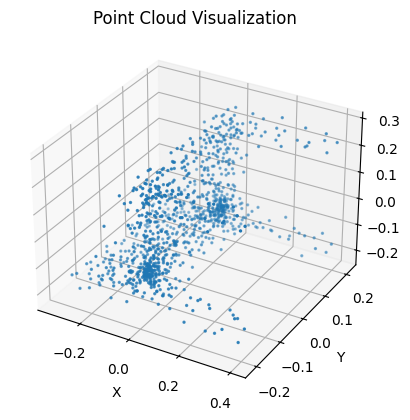

In [6]:
from utils import renderPointCloud
renderPointCloud('result/1013.ply', renderingLib='plt')

In [7]:
# understand the model
from model import PointCloudNet
model = PointCloudNet(num_views=1, point_cloud_size=1024, num_heads=4, dim_feedforward=2048)
model.vit

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


input_feature_dim:4096
dim_feedforward:2048
point_cloud_size:3072


VisionTransformer(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    (norm): Identity()
  )
  (pos_drop): Dropout(p=0.0, inplace=False)
  (patch_drop): Identity()
  (norm_pre): Identity()
  (blocks): Sequential(
    (0): Block(
      (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (attn): Attention(
        (qkv): Linear(in_features=768, out_features=2304, bias=True)
        (q_norm): Identity()
        (k_norm): Identity()
        (attn_drop): Dropout(p=0.0, inplace=False)
        (proj): Linear(in_features=768, out_features=768, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (ls1): Identity()
      (drop_path1): Identity()
      (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=768, out_features=3072, bias=True)
        (act): GELU(approximate='none')
        (drop1): Dropout(p=0.0, inplace=False)
        (norm): Identity(

In [8]:
# prompt: i want to perform inference on model.vit and print output shape

import torch

dummy_input = torch.randn(1, 3, 224, 224) # Assuming the expected input shape for the ViT is (batch_size, channels, height, width)
output = model.vit(dummy_input)
output.shape


torch.Size([1, 768])

In [9]:
# prompt: download dataset from
# 1. https://drive.google.com/file/d/1R7TXnBvVir8OCXPE5f2kck6Enl0gdMUQ/view?usp=sharing
# 2. https://drive.google.com/file/d/1t_rlV1BwitvICap_2ubd5oqL_6Yq-Drn/view?usp=sharing
# 3. https://drive.google.com/drive/folders/1jBPd1YBJwzgVpolT-yA0g8XxYJmb2_s-?usp=sharing

# Install gdown if not already installed
!pip install gdown
!mkdir -p dataset
# Download the files using gdown
# File 1
file_id_1 = '1R7TXnBvVir8OCXPE5f2kck6Enl0gdMUQ'
file_name_1 = 'dataset/file1.zip'  # Replace with your desired file name
!gdown --id '{file_id_1}' -O '{file_name_1}'

# File 2
file_id_2 = '1t_rlV1BwitvICap_2ubd5oqL_6Yq-Drn'
file_name_2 = 'dataset/file2.zip'  # Replace with your desired file name
!gdown --id '{file_id_2}' -O '{file_name_2}'

# For a Google Drive folder, you can use gdown with the --folder flag
# Note: Downloading large folders might take a significant amount of time
folder_id_3 = '1jBPd1YBJwzgVpolT-yA0g8XxYJmb2_s-'
folder_name_3 = 'dataset/split' # Replace with your desired folder name
!gdown --folder '{folder_id_3}' -O '{folder_name_3}'

# You can unzip the downloaded files if they are compressed
print('Unzipping dataset. Wait...')
!unzip -qo dataset/file1.zip -d dataset/
!unzip -qo dataset/file2.zip -d dataset/
print('Unzipping done. Dataset created in directory dataset You can now train the model.')

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1R7TXnBvVir8OCXPE5f2kck6Enl0gdMUQ
From (redirected): https://drive.google.com/uc?id=1R7TXnBvVir8OCXPE5f2kck6Enl0gdMUQ&confirm=t&uuid=22d52684-b05b-4435-bdfb-acf8ae6987e2
To: /content/RGB2point/dataset/file1.zip
100% 1.28G/1.28G [00:15<00:00, 83.4MB/s]
/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1t_rlV1BwitvICap_2ubd5oqL_6Yq-Drn
From (redirected): https://drive.google.com/uc?id=1t_rlV1BwitvICap_2ubd5oqL_6Yq-Drn&confirm=t&uuid=60d2d7e7-9dcf-4e42-ac75-eb54a3f753ed
To: /conte

In [ ]:
!python train.py

input_feature_dim:4096
dim_feedforward:2048
point_cloud_size:3072
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: 3
wandb: You chose "Don't visualize my results"
wandb: Tracking run with wandb version 0.19.11
wandb: W&B syncing is set to `offline` in this directory. Run `wandb online` or set WANDB_MODE=online to enable cloud syncing.
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 12 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
[Train|1] 0/4000 loss:84.0891  cd_loss:84.0891 
[Train|1] 50/4000 loss:871.4061  cd_loss:871.4061 
[Train|1] 100/4000 los